# 予測に寄与した変数を確認する

---

## セットアップ

### モジュールの読み込み

In [1]:
import numpy as np
import pandas as pd
import pickle
import shap
from matplotlib import pyplot as plt

### データの読み込み

In [3]:
with open("/model/data.pickle", mode = "rb") as fp:
    preprocessed_05w, preprocessed_10w, preprocessed_15w, quizscore, importances = pickle.load(fp)

important_features = importances.loc[lambda df: df["diff"] > 0, "name"]
preprocessed_05w = preprocessed_05w[important_features].copy()
preprocessed_10w = preprocessed_10w[important_features].copy()
preprocessed_15w = preprocessed_15w[important_features].copy()
preprocessed = pd.concat([preprocessed_05w, preprocessed_10w, preprocessed_15w], ignore_index = True)

### モデルの読み込み

In [4]:
with open("/model/model.pickle", mode = "rb") as fp:
    estimator = pickle.load(fp)

model = estimator._modellist[0]

---

## 予測に寄与した変数

### SHAP値の算出

In [6]:
%%time
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X = preprocessed)

CPU times: user 9min 38s, sys: 0 ns, total: 9min 38s
Wall time: 1min 14s


### SHAP値の大きさ

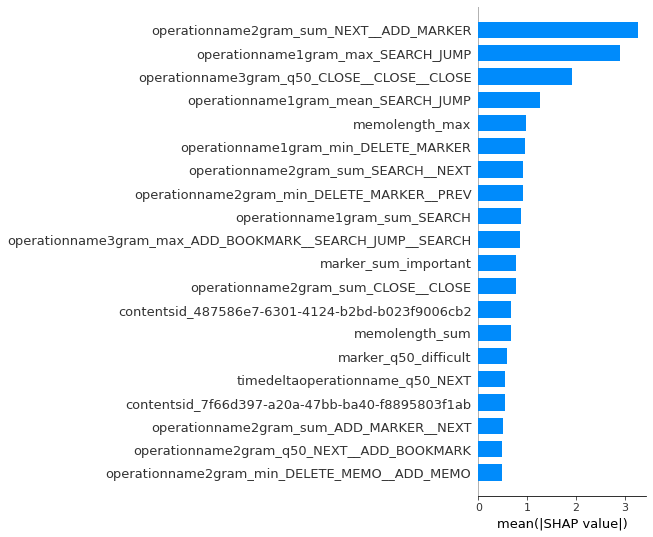

In [24]:
shap.summary_plot(
    shap_values, preprocessed,
    plot_type = "bar",
    plot_size = (3, 9),
    show = False
)
plt.xlabel("mean(|SHAP value|)")
plt.show()

### SHAP値の分布

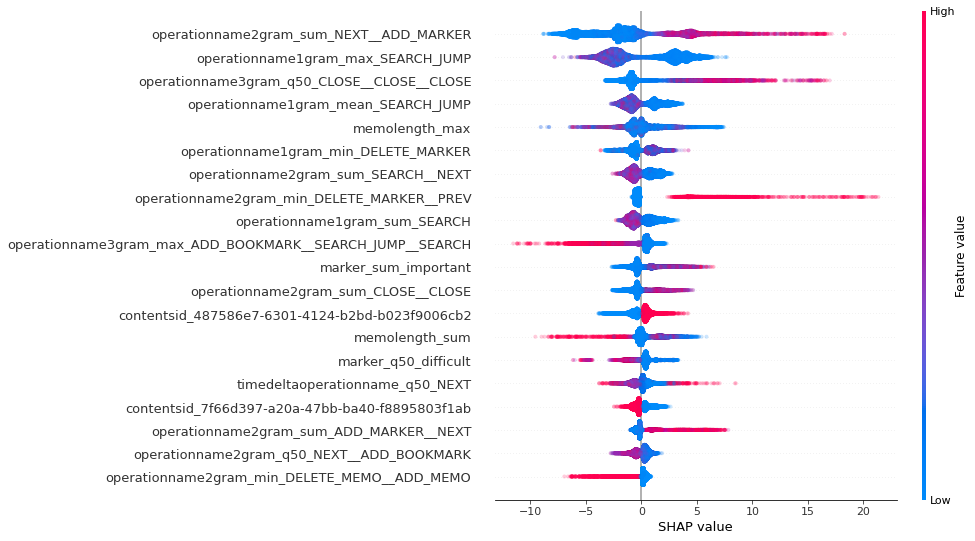

In [25]:
shap.summary_plot(
    shap_values, preprocessed,
    plot_type = "dot",
    plot_size = (9, 9),
    show = False,
    alpha = 0.2
)
plt.xlabel("SHAP value")
plt.show()